In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Data/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.drop(columns=['CustomerID'],axis=1)

In [7]:
x = df.drop(columns=['Spending Score (1-100)'])
y = df['Spending Score (1-100)']

In [24]:
cat_categorical = [feature for feature in x.columns if x[feature].dtype == 'O']

In [30]:
cat_categorical

['Gender']

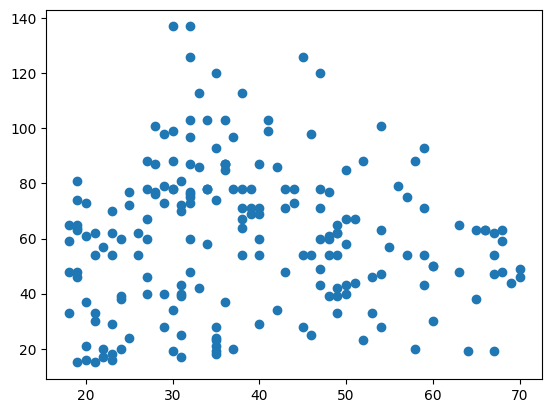

In [13]:
plt.scatter(x['Age'],x['Annual Income (k$)'])

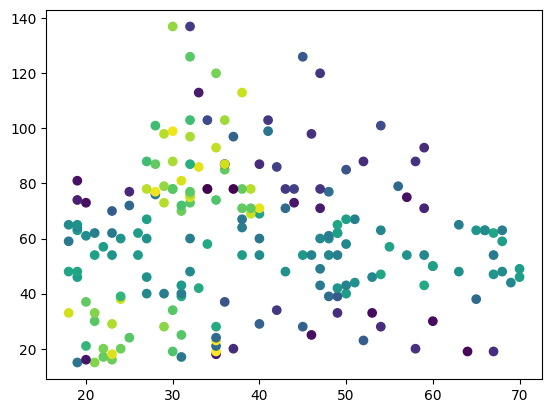

In [14]:
plt.scatter(x['Age'],x['Annual Income (k$)'],c=y)

In [9]:
plt.scatter(x[:,0],x[:,1])

InvalidIndexError: (slice(None, None, None), 0)

In [31]:
x.head()

,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17


In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Suppose these are your categorical columns
# Example:
# cat_columns = ['Gender', 'Country']

# 1. Define the Label/Ordinal Encoder
label_encoder = OrdinalEncoder()

# 2. Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('LabelEncoder', label_encoder, cat_categorical)],
    remainder='passthrough'
)

# 3. Apply transformation
x_encoded = preprocessor.fit_transform(x)

# 4. Get final column names (same as original columns because label encoding doesn't create new features)
final_columns = cat_categorical + [col for col in x.columns if col not in cat_categorical]

# 5. Create a DataFrame
x_transformed = pd.DataFrame(x_encoded, columns=final_columns, index=x.index)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_transformed,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.cluster import KMeans
km = KMeans()
km.fit(x_train)

KMeans()

In [36]:
y_pred = km.predict(x_test)

In [34]:
# Elbow MEthod
WCSS =[]
for k in range(1,11):
    kmean = KMeans(n_clusters=k,init='k-means++')
    kmean.fit(x_train)
    WCSS.append(kmean.inertia_)
WCSS

[149896.2125,
 72634.76942355889,
 48266.3018615041,
 30486.398748003237,
 24652.504829290207,
 20243.43455033529,
 17715.088724071,
 15360.47475045372,
 12755.046545463121,
 10757.158258017944]

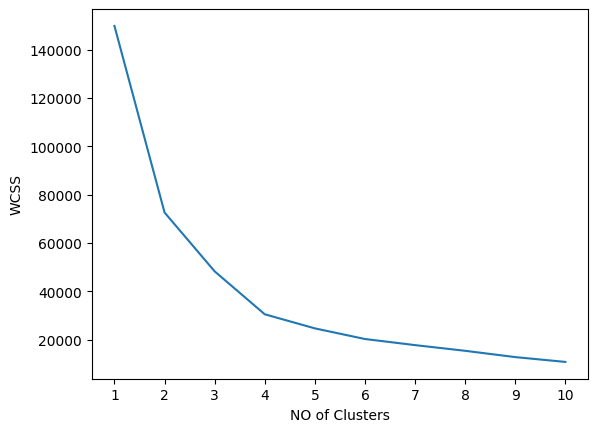

In [35]:
# Plot elbow curve
plt.plot(range(1,11),WCSS)
plt.xticks(range(1,11))
plt.xlabel("NO of Clusters")
plt.ylabel("WCSS")
plt.show()

In [37]:

pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [38]:
from kneed import KneeLocator
kl= KneeLocator(range(1,11),WCSS,curve='convex',direction='decreasing')

In [39]:
kl.elbow

np.int64(4)

In [41]:
# silhoutee Scoring 
from sklearn.metrics import silhouette_score
silhouette_cofficients = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k,init='k-means++')
    kmean.fit(x_train)
    score = silhouette_score(x_train,kmean.labels_)
    silhouette_cofficients.append(score)

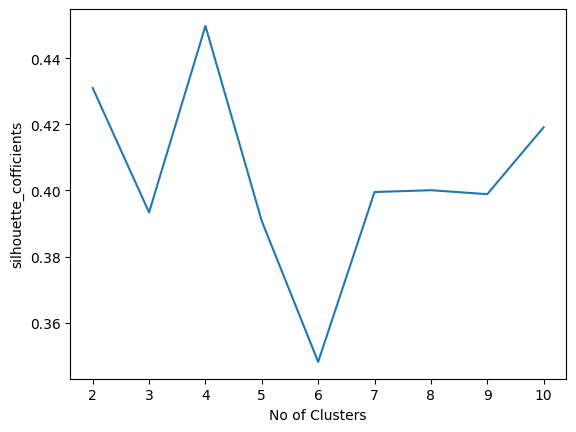

In [42]:
# Plooting silhoutee score
plt.plot(range(2,11),silhouette_cofficients)
plt.xticks(range(2,11))
plt.xlabel('No of Clusters')
plt.ylabel('silhouette_cofficients')
plt.show()